# Bermudan Swaption Pricing using HW and BDT Models

In [19]:
# This program is distributed in the hope that it will be useful, but WITHOUT
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
# FOR A PARTICULAR PURPOSE.  See the license for more details.

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [30]:
from financepy.finutils import *
from financepy.products.bonds import *
from financepy.products.bonds.FinBond import FinBond
from financepy.products.bonds.FinBondEmbeddedOption import FinBondEmbeddedOption

from financepy.market.curves.FinDiscountCurve import FinDiscountCurve
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.market.curves.FinLiborCurve import FinLiborCurve

from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK

## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [31]:
settlementDate = FinDate(1, 1, 2007)

### Set up discount curve

In [32]:
dcType = FinDayCountTypes.ACT_360
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swap1 = FinLiborSwap(settlementDate, FinDate(1,1,2008), 0.05, fixedFreq, dcType)
swap2 = FinLiborSwap(settlementDate, FinDate(1,1,2009), 0.05, fixedFreq, dcType)
swap3 = FinLiborSwap(settlementDate, FinDate(1,1,2010), 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discountCurve = FinLiborCurve("USD_LIBOR", settlementDate, [], [], swaps)

In [48]:
print(discountCurve)

TIMES,DISCOUNT FACTORS
 0.0000000, 1.0000000
 0.9993374, 0.9511698
 2.0014128, 0.9046015
 3.0007502, 0.8604297


TypeError: __str__ returned non-string (type NoneType)

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [34]:
maturityDate = FinDate(1, 1, 2010)
coupon = 0.05
frequencyType = FinFrequencyTypes.ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA

In [35]:
bond = FinBond(maturityDate, coupon, frequencyType, accrualType)

In [36]:
v = bond.valueBondUsingDiscountCurve(settlementDate, discountCurve)

In [37]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62397531182314


Now specify the put and call dates

In [38]:
callDates = []
callPrices = []
putDates = [FinDate(1, 1, 2008), FinDate(1, 1, 2009), FinDate(1, 1, 2010)]
putPrices = [100.0, 100.0, 100.0]

Now create the FinBondEmbeddedOption

In [39]:
puttableBond = FinBondEmbeddedOption(maturityDate, coupon, frequencyType, accrualType,
                                     callDates, callPrices, putDates, putPrices)

### The Hull-White Model

In [40]:
sigma = 0.01  # basis point volatility
a = 0.1
numTimeSteps = 200

In [41]:
model = FinModelRatesHW(a, sigma, numTimeSteps)

In [42]:
v = puttableBond.value(settlementDate, discountCurve, model)

In [43]:
print(v)

{'bondwithoption': 100.47796772091323, 'bondpure': 99.6239753118231}


### Convergence Testing

In [46]:
timeSteps = range(20,220,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesHW(a, sigma, numTimeSteps)
    v = puttableBond.value(settlementDate, discountCurve, model)
    values.append(v['bondwithoption'])

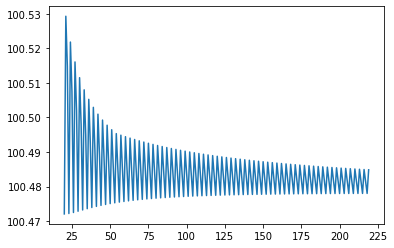

In [47]:
plt.plot(timeSteps, values)

Copyright (c) 2020 Dominic O'Kane